Question 9 - 
Write a program to read the data from the following link, perform data analysis and answer the following questions 
Note - 1. Write code comments wherever required for code understanding 
Link - https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD 
Insights to be drawn - 
* Get all the cars and their types that do not qualify for clean alternative fuel vehicle 
* Get all TESLA cars with the model year, and model type made in Bothell City. 
* Get all the cars that have an electric range of more than 100, and were made after 2015 
* Draw plots to show the distribution between city and electric vehicle type

In [1]:
import csv
import requests
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("dataset/Electric_Vehicle_Population_Data.csv")

In [3]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10


In [4]:
df.shape

(130443, 17)

In [5]:
# Get all the cars and their types that do not qualify for clean alternative fuel vehicle

In [6]:
df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility']!="Clean Alternative Fuel Vehicle Eligible"][['Electric Vehicle Type','Make','Model']]

,Electric Vehicle Type,Make,Model
6,Plug-in Hybrid Electric Vehicle (PHEV),FORD,FUSION
7,Plug-in Hybrid Electric Vehicle (PHEV),AUDI,Q5 E
8,Plug-in Hybrid Electric Vehicle (PHEV),FORD,C-MAX
11,Battery Electric Vehicle (BEV),TESLA,MODEL Y
14,Plug-in Hybrid Electric Vehicle (PHEV),FORD,C-MAX
...,...,...,...
130437,Plug-in Hybrid Electric Vehicle (PHEV),BMW,530E
130438,Battery Electric Vehicle (BEV),TESLA,MODEL Y
130439,Battery Electric Vehicle (BEV),NISSAN,LEAF
130440,Battery Electric Vehicle (BEV),TESLA,MODEL Y


In [7]:
# Get all TESLA cars with the model year, and model type made in Bothell City.

In [8]:
df.head()
df[(df['Make']== 'TESLA') & (df['City'] == 'Bothell')].head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
39,5YJ3E1EA6L,Snohomish,Bothell,WA,98012.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266,0,21.0,127506886,POINT (-122.21061 47.83448),PUGET SOUND ENERGY INC,5.306105e+10
217,5YJ3E1EB9N,King,Bothell,WA,98011.0,2022,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,195097472,POINT (-122.20563 47.76144),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
218,7SAYGDEEXN,Snohomish,Bothell,WA,98012.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,205456996,POINT (-122.21061 47.83448),PUGET SOUND ENERGY INC,5.306105e+10
222,5YJ3E1EB6J,King,Bothell,WA,98011.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,1.0,200733662,POINT (-122.20563 47.76144),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
292,5YJXCBE40H,King,Bothell,WA,98011.0,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,1.0,229900653,POINT (-122.20563 47.76144),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10


In [9]:
# Get all the cars that have an electric range of more than 100, and were made after 2015

In [10]:
df.head()
df[(df['Electric Range']> 100) & (df['Model Year']>2015)].head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10
12,5YJ3E1EC7L,Thurston,Lacey,WA,98503.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,22.0,2135486,POINT (-122.82324 47.04437),PUGET SOUND ENERGY INC,5.306701e+10
13,5YJ3E1EB2L,Thurston,Olympia,WA,98516.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,22.0,124645363,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10


In [11]:
# Draw plots to show the distribution between city and electric vehicle type

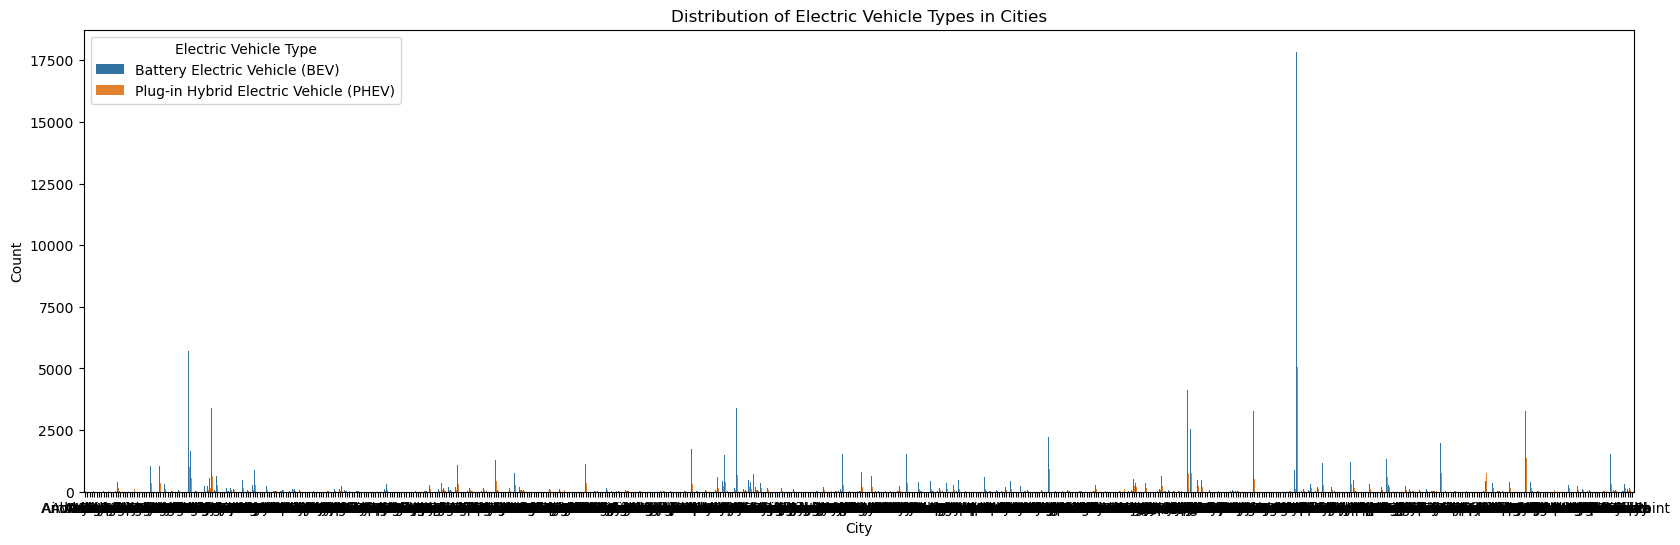

In [12]:
count_data = df.groupby(['City', 'Electric Vehicle Type']).size().reset_index(name='Count')

# Plot the bar plot
plt.figure(figsize=(20,6))
sns.barplot(x='City', y='Count', hue='Electric Vehicle Type', data=count_data)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Distribution of Electric Vehicle Types in Cities')
plt.legend(title='Electric Vehicle Type')
plt.show()